In [1]:
import pandas as pd
import numpy as np
import scipy
import sys, os, pickle, librosa
import librosa.display
from IPython.display import Audio
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow import keras

D:\Sam\miniconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
D:\Sam\miniconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
D:\Sam\miniconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
D:\Sam\miniconda3\envs\venv\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWa

In [6]:
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r'./data/features_3_sec.csv')
df = df.drop(labels='filename', axis=1)

In [3]:
df

,length,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,...,mfcc16_var,mfcc17_mean,mfcc17_var,mfcc18_mean,mfcc18_var,mfcc19_mean,mfcc19_var,mfcc20_mean,mfcc20_var,label
0,66149,0.335406,0.091048,0.130405,0.003521,1773.065032,167541.630869,1972.744388,117335.771563,3714.560359,...,39.687145,-3.241280,36.488243,0.722209,38.099152,-5.050335,33.618073,-0.243027,43.771767,blues
1,66149,0.343065,0.086147,0.112699,0.001450,1816.693777,90525.690866,2010.051501,65671.875673,3869.682242,...,64.748276,-6.055294,40.677654,0.159015,51.264091,-2.837699,97.030830,5.784063,59.943081,blues
2,66149,0.346815,0.092243,0.132003,0.004620,1788.539719,111407.437613,2084.565132,75124.921716,3997.639160,...,67.336563,-1.768610,28.348579,2.378768,45.717648,-1.938424,53.050835,2.517375,33.105122,blues
3,66149,0.363639,0.086856,0.132565,0.002448,1655.289045,111952.284517,1960.039988,82913.639269,3568.300218,...,47.739452,-3.841155,28.337118,1.218588,34.770935,-3.580352,50.836224,3.630866,32.023678,blues
4,66149,0.335579,0.088129,0.143289,0.001701,1630.656199,79667.267654,1948.503884,60204.020268,3469.992864,...,30.336359,0.664582,45.880913,1.689446,51.363583,-3.392489,26.738789,0.536961,29.146694,blues
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9985,66149,0.349126,0.080515,0.050019,0.000097,1499.083005,164266.886443,1718.707215,85931.574523,3015.559458,...,42.485981,-9.094270,38.326839,-4.246976,31.049839,-5.625813,48.804092,1.818823,38.966969,rock
9986,66149,0.372564,0.082626,0.057897,0.000088,1847.965128,281054.935973,1906.468492,99727.037054,3746.694524,...,32.415203,-12.375726,66.418587,-3.081278,54.414265,-11.960546,63.452255,0.428857,18.697033,rock
9987,66149,0.347481,0.089019,0.052403,0.000701,1346.157659,662956.246325,1561.859087,138762.841945,2442.362154,...,78.228149,-2.524483,21.778994,4.809936,25.980829,1.775686,48.582378,-0.299545,41.586990,rock
9988,66149,0.387527,0.084815,0.066430,0.000320,2084.515327,203891.039161,2018.366254,22860.992562,4313.266226,...,28.323744,-5.363541,17.209942,6.462601,21.442928,2.354765,24.843613,0.675824,12.787750,rock


In [4]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9990 entries, 0 to 9989
Data columns (total 59 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   length                   9990 non-null   int64  
 1   chroma_stft_mean         9990 non-null   float64
 2   chroma_stft_var          9990 non-null   float64
 3   rms_mean                 9990 non-null   float64
 4   rms_var                  9990 non-null   float64
 5   spectral_centroid_mean   9990 non-null   float64
 6   spectral_centroid_var    9990 non-null   float64
 7   spectral_bandwidth_mean  9990 non-null   float64
 8   spectral_bandwidth_var   9990 non-null   float64
 9   rolloff_mean             9990 non-null   float64
 10  rolloff_var              9990 non-null   float64
 11  zero_crossing_rate_mean  9990 non-null   float64
 12  zero_crossing_rate_var   9990 non-null   float64
 13  harmony_mean             9990 non-null   float64
 14  harmony_var             

In [5]:
df.isnull().sum().sort_values(ascending=False)

length                     0
mfcc14_mean                0
mfcc8_mean                 0
mfcc8_var                  0
mfcc9_mean                 0
mfcc9_var                  0
mfcc10_mean                0
mfcc10_var                 0
mfcc11_mean                0
mfcc11_var                 0
mfcc12_mean                0
mfcc12_var                 0
mfcc13_mean                0
mfcc13_var                 0
mfcc14_var                 0
mfcc7_mean                 0
mfcc15_mean                0
mfcc15_var                 0
mfcc16_mean                0
mfcc16_var                 0
mfcc17_mean                0
mfcc17_var                 0
mfcc18_mean                0
mfcc18_var                 0
mfcc19_mean                0
mfcc19_var                 0
mfcc20_mean                0
mfcc20_var                 0
mfcc7_var                  0
mfcc6_var                  0
chroma_stft_mean           0
harmony_var                0
chroma_stft_var            0
rms_mean                   0
rms_var       

In [4]:
audio_recordings = "./data/genres_original/country/country.00050.wav"
data, sr = librosa.load(audio_recordings, sr=45600)

In [16]:
data

array([ 0.04582627,  0.06254332,  0.0583379 , ..., -0.13857861,
       -0.11823352, -0.05911855], dtype=float32)

In [7]:
sr

45600

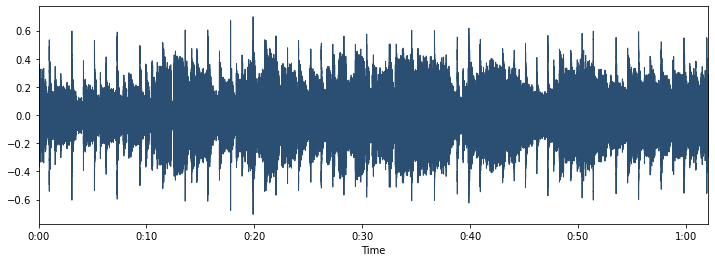

In [7]:
plt.figure(figsize=(12,4))
librosa.display.waveplot(data, color= '#2B4F72')

(0.0, 11000.0)

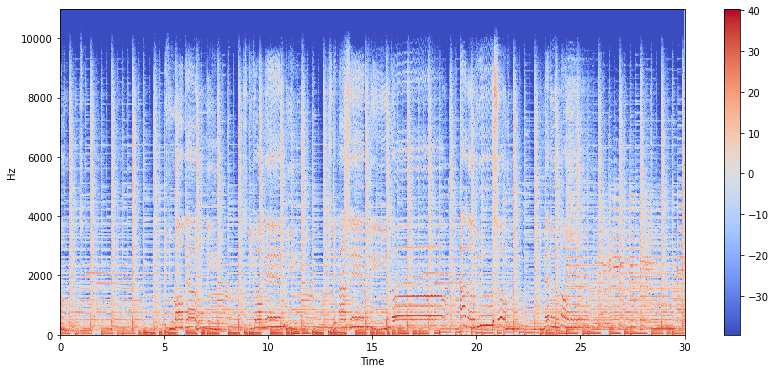

In [25]:
stfr = librosa.stft(data)
stfr_db = librosa.amplitude_to_db(abs(stfr))
# plt.figure(figsize=(14,6))
fig, ax = plt.subplots(figsize=(14,6))
im = librosa.display.specshow(stfr_db, sr=sr, x_axis='time', y_axis='hz',ax=ax)
fig.colorbar(im)
ax.set_ylim([0, 11000])

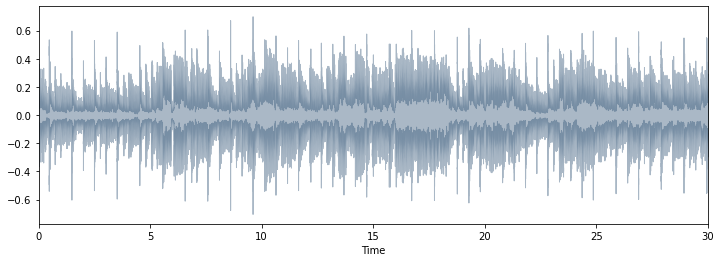

In [26]:
from sklearn.preprocessing import normalize
spectral_rolloff = librosa.feature.spectral_rolloff(data+0.01, sr=sr)[0]
plt.figure(figsize=(12,4))
librosa.display.waveplot(data,sr=sr,alpha=0.4, color="#2B4F72")

In [27]:
import librosa.display as lplt

Text(0.5, 1.0, 'Chroma Features')

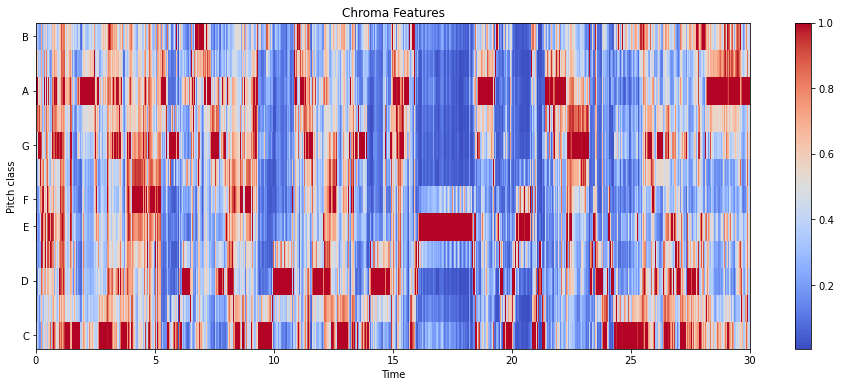

In [28]:
chroma = librosa.feature.chroma_stft(data, sr=sr)
plt.figure(figsize=(16,6))
lplt.specshow(chroma, sr=sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
plt.colorbar()
plt.title('Chroma Features')

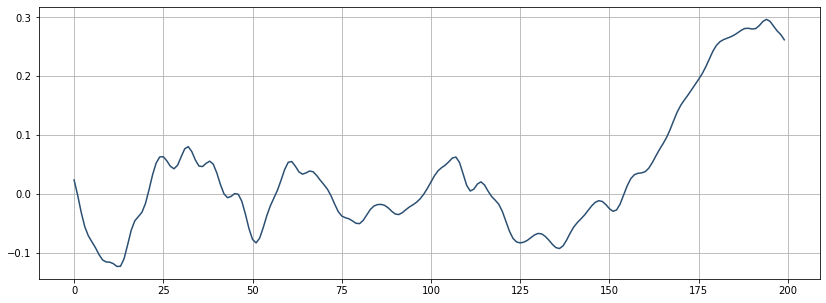

In [29]:
start = 1000
end = 1200
plt.figure(figsize=(14,5))
plt.plot(data[start:end], color='#2B4F72')
plt.grid()

In [30]:
data.shape

(1368608,)

In [32]:
zero_cross_rate = librosa.zero_crossings(data[start:end], pad=False)
print('The number of zero-crossings is: ', sum(zero_cross_rate))

The number of zero-crossings is:  10
